<a href="https://colab.research.google.com/github/Rakin003/Rakin_Code_Workshop/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_path = '/content/drive/MyDrive/chicken_dataset/Resized_Augmented_Dataset.zip'
extract_to = '/content/chicken_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam


img_size = (224, 224)
batch_size = 32
data_path = '/content/chicken_dataset/train(Resized_Augmented)'

# Use ResNet's preprocessing
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build ResNet50 model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=img_size + (3,))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Found 4040 images belonging to 10 classes.
Found 1010 images belonging to 10 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 49s 268ms/step - accuracy: 0.5341 - loss: 1.4748 - val_accuracy: 0.9564 - val_loss: 0.1866
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.9032 - loss: 0.2965 - val_accuracy: 0.9762 - val_loss: 0.1009
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - accuracy: 0.9519 - loss: 0.1625 - val_accuracy: 0.9733 - val_loss: 0.0923
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.9717 - loss: 0.1031 - val_accuracy: 0.9624 - val_loss: 0.1261
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - accuracy: 0.9819 - loss: 0.0749 - val_accuracy: 0.9812 - val_loss: 0.0769
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.9861 - loss: 0.0568 - val_accuracy: 0.9703 - val_loss: 0.0807
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - accuracy: 0.9881 - loss: 0.0500 - val_accuracy: 0.9851 - val_loss: 0.0642
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 169ms/step - accuracy: 0.9894 - loss: 0

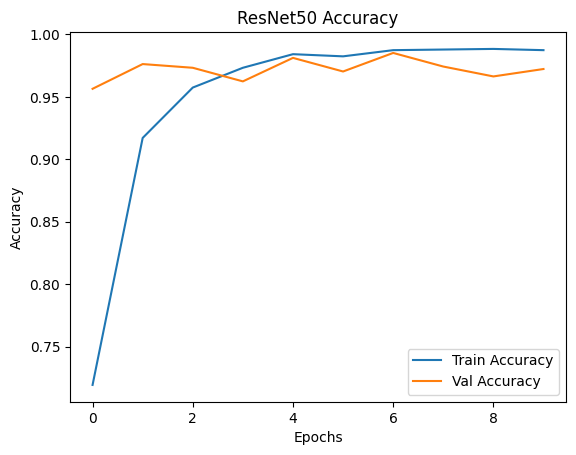

[0.7193069458007812, 0.9170792102813721, 0.9574257135391235, 0.9732673168182373, 0.9841583967208862, 0.9824257493019104, 0.9873762130737305, 0.9878712892532349, 0.9883663654327393, 0.9873762130737305]
[0.9564356207847595, 0.9762375950813293, 0.9732673168182373, 0.9623762369155884, 0.9811881184577942, 0.9702970385551453, 0.9851484894752502, 0.9742574095726013, 0.9663366079330444, 0.9722772240638733]


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet50 Accuracy')
plt.show()
print(history.history['accuracy'])
print(history.history['val_accuracy'])

In [ ]:
model.save('/content/chicken_breed_classifier_ResNet50.h5')